In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### CLASS ###

We'll be using the [Cosmic Linear Anisotropy Solving System](http://class-code.net/) (CLASS) Boltzmann code to compute the evolution of the perturbations as a function of time.

The CLASS code is very well documented and maintained, and a public version is avaialble [at this GitHub repo](https://github.com/lesgourg/class_public), making it easy to keep up to date (or to contribute!).

If you clone the repository, e.g. with
`git clone https://github.com/lesgourg/class_public class`
then you can just go into the class directory and "make" the code.  I've never had a problem with this on any machine that a few edits to the Makefile didn't fix.  If you want to install the Python interface just go into the Python directory and use `python setup.py install`.  On the datahub you can install as root so you don't need the `--user`, otherwise you can use your own system.  There is also a `Conda` version if you use an Anaconda python distribution.

In [2]:
# Import the Class class.
from classy import Class

### Evolution of a single k mode ###

Let's study the evolution of a single $k$ mode with time.  We will look at the CDM density perturbation, the photon density perturbation and the photon velocity (divergence) and how they evolve.

In [3]:
# Define the cosmology (what is not specified will be set to CLASS default parameters).
# We'll use the "Planck 2018 cosmology" (plus BAO), defined in the right-hand column
# of Table 6 in https://arxiv.org/pdf/1807.06205.pdf
#
# The k-value we want to follow.
kval = 0.1  # 1/Mpc
#
params = {
    'output':'mPk',
    'k_output_values': kval,
    'compute damping scale':'yes',
    'gauge':'newtonian',
    'A_s': np.exp(3.040)*1e-10,
    'n_s': 0.96824,
    'h': 0.6770,
    'N_ur': 2.0328,
    'N_ncdm': 1,
    'm_ncdm': 0.06,
    'tau_reio': 0.0568,
    'omega_b': 0.022447,
    'omega_cdm': 0.11923}
#

#
# Create an instance of the CLASS wrapper, set the parameters and
# run the code. It should take about a second...
cosmo = Class()
cosmo.set(params)
cosmo.compute()

In [4]:
all_k = cosmo.get_perturbations()  
one_k = all_k['scalar'][0]     # scalar perturbations for kval
print(one_k.keys())
#    
tau = one_k['tau [Mpc]']
dc  = one_k['delta_cdm']
db  = one_k['delta_b']
dg  = one_k['delta_g']
vg  = one_k['theta_g']  # Really velocity divergence, despite "vg" name.
phi = one_k['phi']
psi = one_k['psi']
vb  = one_k['theta_b']
a   = one_k['a']

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'delta_ncdm[0]', 'theta_ncdm[0]', 'shear_ncdm[0]', 'cs2_ncdm[0]'])


Text(0.5, 1.0, 'Newtonian Gauge')

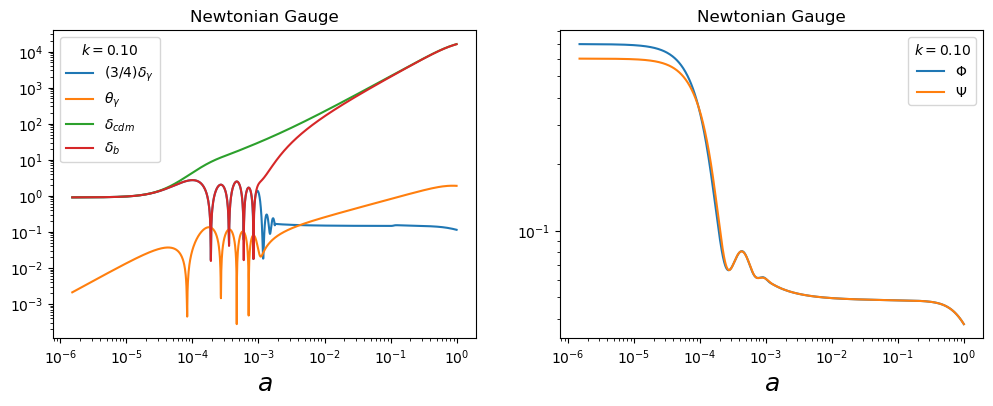

In [5]:
# Now make a plot!
#
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(a,np.abs(0.75*dg),label=r'$(3/4)\delta_\gamma$')
ax[0].plot(a,np.abs(vb),label=r'$\theta_\gamma$')
ax[0].plot(a,np.abs(dc),label=r'$\delta_{cdm}$')
ax[0].plot(a,np.abs(db),label=r'$\delta_b$')
#
ax[0].legend(title="$k={:.2f}$".format(kval))
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('$a$',fontsize=18)
ax[0].set_title('Newtonian Gauge')
#
ax[1].plot(a,np.abs(phi),label='$\Phi$')
ax[1].plot(a,np.abs(psi),label='$\Psi$')
#
ax[1].legend(title="$k={:.2f}$".format(kval))
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('$a$',fontsize=18)
ax[1].set_title('Newtonian Gauge')

We should see that the CDM, baryon and photon density perturbations are constant (note the normalization!) outside the horizon ($a\to 0$) with the photon velocity divergence growing.  The photon density perturbation should be larger than the CDM and baryon density perturbations by a constant factor (4/3) so we've plotted $(3/4)\delta_\gamma$ to highlight this.

Once the mode crosses the horizon the CDM perturbation will begin to grow while the baryon and photon perturbations will oscillate until recombination ($a\simeq 10^{-3}$).  You can cross-check that our mode crosses the horizon at the right place by comparing $k=aH$ using the background quantities produced by CLASS.  After recombination the photon power will damp to a constant value (it's actually moving into the higher $\ell$ modes of the distribution function as a given scale subtends a smaller and smaller angle at the observer's distance from last scattering).  The baryons, being released from the photon pressure, will grow.  They fall into the CDM potential wells and so eventually catch up to the CDM.

The CDM evolution is interesting.  Note that it starts to grow as it crosses the horizon.  That growth is slowed down while the photon-baryon fluid is oscillating because the contribution of $\rho_{b+\gamma}$ to $\Phi$ and $\Psi$ isn't as large as it would have been if the pressure hadn't halted their collapse.  Once the baryons are released from the photons, and the universe has become matter dominated, the growth goes into a $\delta\propto a$ phase.  If you were to zoom in on the region near $a=1$ you'd see the growth halting.

Growth shortfall is 0.78


Text(0.5, 1.0, 'Newtonian Gauge')

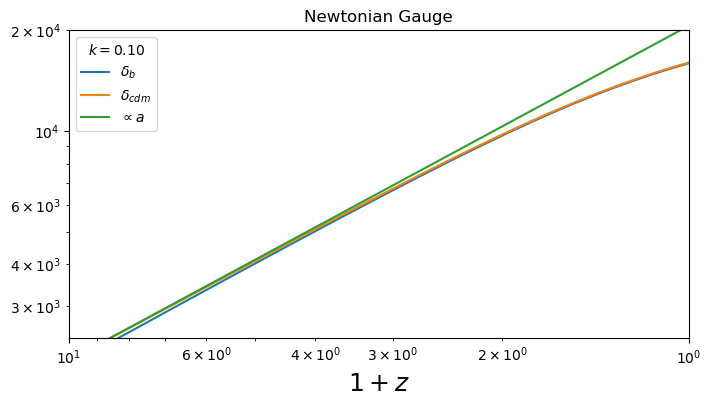

In [6]:
#
# Zoom in on the epoch of Lambda domination to see the growth of the
# CDM (and baryons) halting.
#
fig,ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(1/a,np.abs(db),label=r'$\delta_b$')
ax.plot(1/a,np.abs(dc),label=r'$\delta_{cdm}$')
# Compare to \delta\propto a.
d0 = np.abs(np.interp(0.1,a,dc))
ax.plot(1/a,d0*(a/0.1),label=r'$\propto a$')
#
maxdc = np.max(np.abs(dc))
print("Growth shortfall is {:.2f}".format(maxdc/(d0*10)))
#
ax.legend(title="$k={:.2f}$".format(kval))
ax.set_xlim(10.0,1.0)
ax.set_ylim(0.15*maxdc,1.25*maxdc)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$1+z$',fontsize=18)
ax.set_title('Newtonian Gauge')
#